In [112]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm

In [113]:
murderByStateByWeapon = pd.read_csv(open("murderByStateByWeapon.csv"))
murderByStateByWeapon.set_index('State', inplace=True)
murdersByState = murderByStateByWeapon[['Handguns','Shotguns', 'Rifles']]

temp = []
for index, row in murdersByState.iterrows():
    total = int(row.Handguns) + int(row.Shotguns) + int(row.Rifles)
    temp.append(total)
murdersByState['Total murders'] = temp  

[Text(0,0.5,'Murders'),
 Text(0.5,0,'State'),
 Text(0.5,1,'Murders per state by weapon')]

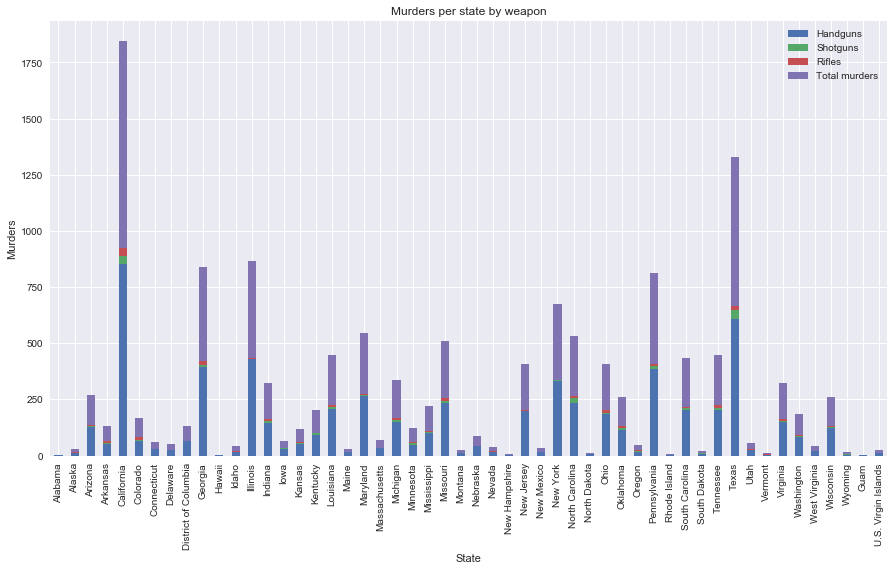

In [114]:
axes = murdersByState.plot.bar(figsize=(15,8), stacked=True)
axes.set(xlabel="State", ylabel="Murders", title="Murders per state by weapon")

In [115]:
df[['Total murders']].plot.pie(subplots=True, figsize=(30, 25))

NameError: name 'df' is not defined

In [ ]:
murdersByState.hist(bins=25, weights=np.ones_like(df[df.columns[0]]), figsize=(20, 15))

In [ ]:
murdersByState.plot.area(stacked=False, figsize=(25, 20))

In [ ]:
df_shootings = pd.read_csv(open('shootings.csv'))
df_shootings

In [ ]:
incident_count = {}
affected_count = {}
for i, row in df_shootings.iterrows():
    if row['State'] in incident_count:
        incident_count[row['State']] += 1
    else:
        incident_count[row['State']] = 1
        
    if row['State'] in affected_count:
        affected_count[row['State']] += (int(row['# Killed']) + int(row['# Injured']))
    else:
        affected_count[row['State']] = (int(row['# Killed']) + int(row['# Injured']))

In [ ]:
df_incident = pd.DataFrame([incident_count]).transpose()
df_affected = pd.DataFrame([affected_count]).transpose()

In [ ]:
df_incident.columns = ['# Mass Shootings Incident']
df_affected.columns = ['# Affected in Mass Shootings']

murdersByStateByWeaponVSMassShootings = pd.concat([murdersByState, df_incident, df_affected], axis=1)
murdersByStateByWeaponVSMassShootings = murdersByStateByWeaponVSMassShootings.fillna(0)
murdersByStateByWeaponVSMassShootings

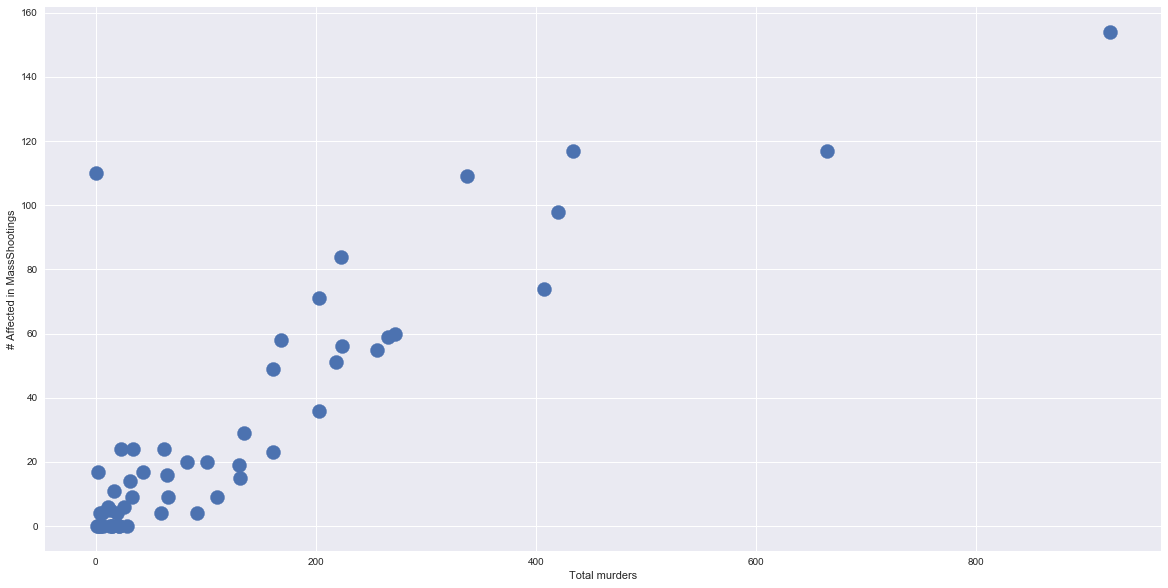

In [116]:
murdersByStateByWeaponVSMassShootings.plot(x='Total murders', y='# Affected in MassShootings', kind='scatter', figsize=(20,10), s=200)

In [117]:
sns.set(rc={'figure.figsize':(20,10)})


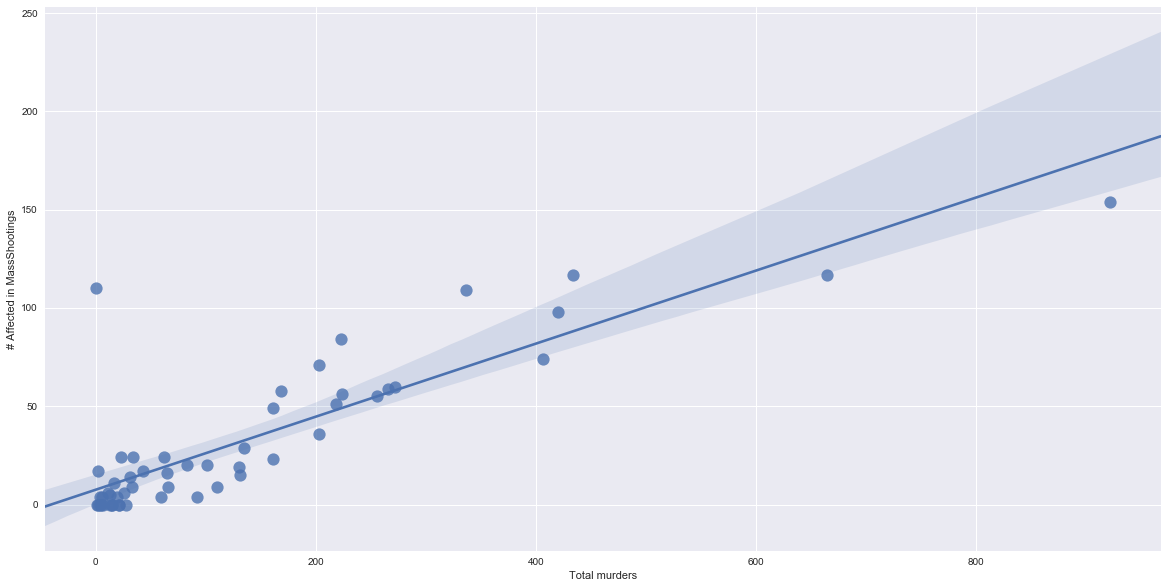

In [118]:
sns.regplot(x='Total murders', y='# Affected in MassShootings', data=murdersByStateByWeaponVSMassShootings, fit_reg=True,  scatter_kws={'s':150 }) 

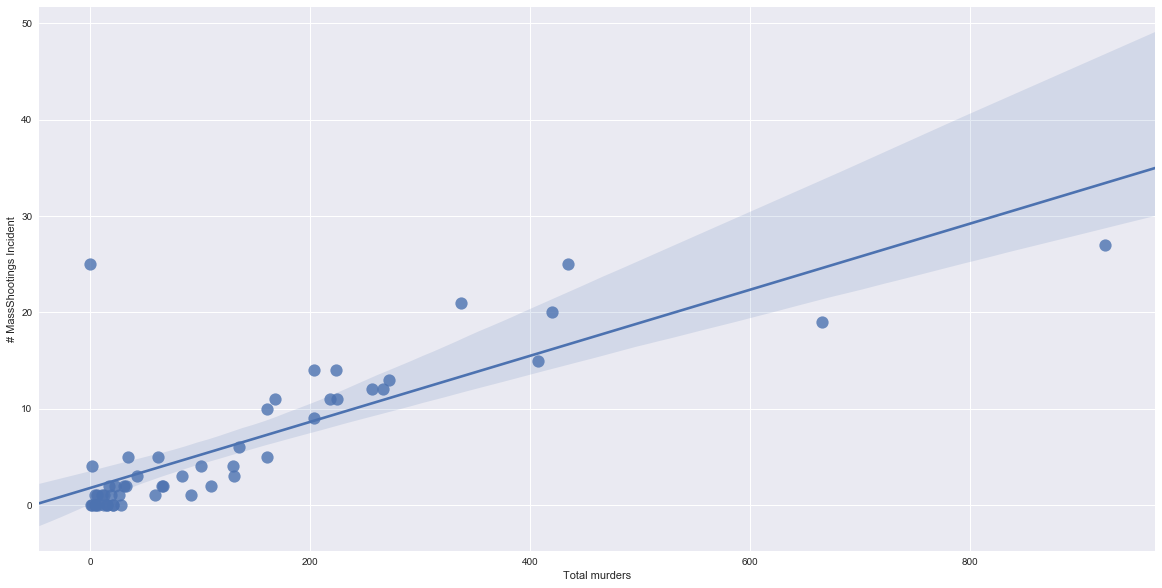

In [119]:
sns.regplot(x='Total murders', y='# MassShootings Incident', data=murdersByStateByWeaponVSMassShootings, fit_reg=True, scatter_kws={'s':150 }) 

In [120]:
totalMurdersVSMassShootingIncidents = murdersByStateByWeaponVSMassShootings[['Total murders','# MassShootings Incident']]
totalMurdersVSPeopleAffectedInMassShootings = murdersByStateByWeaponVSMassShootings[['Total murders','# Affected in MassShootings']]

In [121]:
totalMurdersVSMassShootingIncidents.columns = ['murders', 'incidents']
totalMurdersVSPeopleAffectedInMassShootings.columns = ['murders', 'affected']

In [122]:
out, pred = patsy.dmatrices('incidents ~ murders', totalMurdersVSMassShootingIncidents)
mod = sm.OLS(out, pred)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              incidents   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     101.5
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           1.01e-13
Time:                        15:59:45   Log-Likelihood:                -152.50
No. Observations:                  53   AIC:                             309.0
Df Residuals:                      51   BIC:                             312.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7724      0.750      2.362      0.0

In [124]:
out, pred = patsy.dmatrices('affected ~ murders', totalMurdersVSPeopleAffectedInMassShootings)
mod = sm.OLS(out, pred)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               affected   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     146.3
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           1.34e-16
Time:                        15:59:59   Log-Likelihood:                -232.31
No. Observations:                  53   AIC:                             468.6
Df Residuals:                      51   BIC:                             472.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5677      3.382      2.238      0.0